## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Camera Calibration

The first step in this proces is to calibrate the camera. Camera lenses introduce distortions in images. The two primary types of distortions that we care about are radial distortion and tangential distortion. 

**Radial distortion** is th effect where the magnification is greatest/lowest in the center of the image and decreases/increases moving radially away from the center. The effect is quadratic and the calibration will fit a 6 degree polynomial.

**Tangential distortion** is the effect where the lense is not parallel with the imaging surface. A good way to visualize this would be to draw a plane infront of a camera. If you tilt the plane about the vertical or horizontal axis half the image will apear closer while the other half will apear farther away.

To calibrate a camera we need to map real world coordinates to image coordinates. Given a uniform pattern we expect the points to be evenly spaced, however, due to distortion this will not be the case. To compute the coefficients for the radial and tangential distortions we use the errors in the image positions.

For this calibration we will use a 9x6 chessboard pattern. We do not know the dimensions of the chessboard so we will calibrate it relative to the chessboard (unit will be the side length of a square in the chessboard).

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(9,6,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

## Compute Distortion Coefficients

Now that we have generated the object points and images point we can compute the distortion coefficients.

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

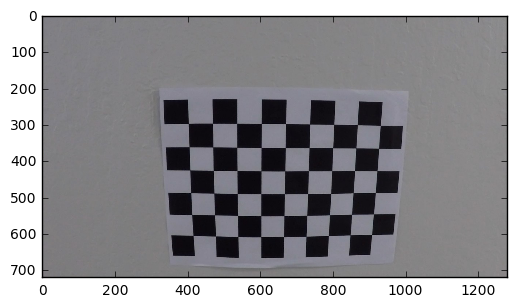

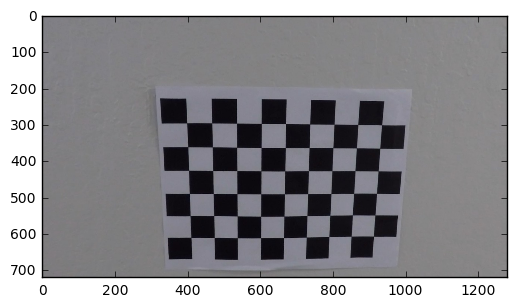

In [14]:
img = mpimg.imread(images[3])
plt.figure()
plt.imshow(img)

dst = cv2.undistort(img, mtx, dist, None, None)
plt.figure()
plt.imshow(dst)